In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import imageio

class Constants:
    q = 4.8e-10
    c = 3e10
    hbar = 1.05e-27
    E_s = 4.4e13
    G = 6.67e-8
    alpha = 1 / 137
    M = 3e33
    R_ns = 1e6
    sigma = 6.65e-25
    R_c = 1e7
    m_e = 9.1e-28
    D = 3e26
    delta_nu = 1e8
    efficiency = 1e-4

def b_single(t, a0, r, theta, phi, B_s, theta_m):

    # Find the magnetic field at a point r, theta, phi, t
    a = a_t(t, a0) # separation
    beta = beta_t(a) # magnetar linear velocity
    phi_m = phi_m_t(beta, t, a) # magnetar phi coordinate

    # Convert to x,y,z
    x1 = Constants.R_ns * r * np.sin(theta) * np.cos(phi)
    x2 = Constants.R_ns * (a / Constants.R_ns) * np.sin(theta_m) * np.cos(phi_m)
    y1 = Constants.R_ns * r * np.sin(theta) * np.sin(phi)
    y2 = Constants.R_ns * (a / Constants.R_ns) * np.sin(theta_m) * np.sin(phi_m)
    z1 = Constants.R_ns * r * np.cos(theta)
    z2 = Constants.R_ns * (a / Constants.R_ns) * np.cos(theta_m)

    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    hypo = np.sqrt(dx ** 2 + dy ** 2 + dz ** 2) # Distance from point r,theta,phi to magnetar centre

    # Uncomment below to mask NS location
    if hasattr(hypo, '__len__'):
        mask1 = Constants.R_ns > hypo
        mask2 = np.invert(mask1 | mask2)

        b = np.zeros(len(hypo))
        b[mask1] = 0
        b[mask2] = B_s * (Constants.R_ns ** 3) / (hypo[mask3] ** 3) # magnetic field strength

    else:

        if Constants.R_ns > hypo:
            b = 0
        elif r < 1.0:
            b = 0
        else:
            b = B_s * (Constants.R_ns ** 3) / (hypo ** 3) # magnetic field strength

#     b = B_s * (Constants.R_ns ** 3) / (hypo ** 3)
    # if b > B_s:
    #     return B_s
    # else:

    return b

def beta_t(a):
    return np.sqrt(2 * Constants.G * Constants.M / a) / Constants.c


def phi_m_t(beta, t, a):
    return (beta * Constants.c) * (t / a)
    # return 2 * np.pi / 3
    
def f_single(t, a0, r, theta, phi, B_s, theta_m):
    # Function to find the electric field E1 due to conductor motion at time t
    # should also take r,theta,phi as arguments
    if r <= 1.0:
        return 0

    a = a_t(t, a0)
    beta = beta_t(a)
    b_val = b_single(t, a0, r, theta, phi, B_s, theta_m)

#     Eq. from Lyutikov
#     numerator = -3 * np.sin(theta) * np.cos(theta) * (6 - r ** (-3)) * np.cos(phi) * b_val * beta * r ** (-3)
#     denominator = 2 * np.sqrt(2) * np.sqrt(8 * (1 - r **
#                                                 (-3)) ** 2 + 6 * (4 - r ** (-3)) * r ** (-3) * np.sin(theta) ** 2)
    
#     Eq. from Om 
#     numerator = 3 * np.sin(theta)* np.cos(theta) * np.cos(phi) * (1 - r ** (-3)) * b_val * beta * r ** (-3)
#     denominator = np.sqrt(4 * np.cos(theta)**2 * (1 - r ** (-3))**2 + np.sin(theta)**2 * (2+ r ** (-3))**2)
    numerator = 3 * np.sin(theta) * np.cos(theta)* np.cos(phi) * (1 - r ** (-3)) *b_val * beta * r ** (-3)
    denominator = np.sqrt(4 *np.cos(theta)**2 * (1 - r **(-3))** 2 + (2 + r ** (-3))**2 * np.sin(theta) ** 2)


    return numerator / denominator


def t_merge(a, a_min):
    return t_t(a) - t_t(a_min)


def a_t(t, a0):
    return ((a0 ** 4) * (1 - (t / t_t(a0)))) ** (1 / 4)

def t_t(a):
    return ((5 / 512) * Constants.c ** 5 * a ** 4) / (Constants.G ** 3 * Constants.M ** 3)



In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import imageio

# Define Parameters
a0 = 4.5e6  # Max separation
a_min = 2.6e6  # Min separation
t_max = t_merge(a0, a_min)  # Time of merger
print(t_max)
num_timesteps = 1000

#  Uncomment for linear timesteps
t_arr = np.linspace(0, t_max, num_timesteps)



choice_panels = 0


resolution = 200


phi_arr = np.linspace(0, 2 * np.pi, resolution)
theta_arr = [np.pi/4]  #
r_arr = np.linspace(0, 5, resolution)


# Set Magnetar conditions
theta_m = np.pi / 2
B_s = 1e12
v0 = np.sqrt(2 * Constants.G * Constants.M / a0)


E_arr_full = np.zeros((len(r_arr), len(theta_arr), len(phi_arr), len(t_arr)))



# Next loop over spatial dimensions
for i, r in enumerate(r_arr):
    print('r: ', i + 1, '/', len(r_arr))
    for j, theta in enumerate(theta_arr):

        for k, phi in enumerate(phi_arr):

            for num, t in enumerate(t_arr):
                # For each spatial element, loop over time
                if num > 1:
                    B = b_single(t, a0, r, theta, phi, B_s, theta_m) # Find the magnetic field at r,theta,phi,t

                    E = f_single(t, a0, r, theta, phi, B_s, theta_m) # Find the induced electric field at t
                    E_arr_full[i, j, k, num] = np.abs(E) # log it in the array
                    
            



0.010791991259077538
r:  1 / 200
r:  2 / 200
r:  3 / 200
r:  4 / 200
r:  5 / 200
r:  6 / 200
r:  7 / 200
r:  8 / 200
r:  9 / 200
r:  10 / 200
r:  11 / 200
r:  12 / 200
r:  13 / 200
r:  14 / 200
r:  15 / 200
r:  16 / 200
r:  17 / 200
r:  18 / 200
r:  19 / 200
r:  20 / 200
r:  21 / 200
r:  22 / 200
r:  23 / 200
r:  24 / 200
r:  25 / 200
r:  26 / 200
r:  27 / 200
r:  28 / 200
r:  29 / 200
r:  30 / 200
r:  31 / 200
r:  32 / 200
r:  33 / 200
r:  34 / 200
r:  35 / 200
r:  36 / 200
r:  37 / 200
r:  38 / 200
r:  39 / 200
r:  40 / 200
r:  41 / 200
r:  42 / 200
r:  43 / 200
r:  44 / 200
r:  45 / 200
r:  46 / 200
r:  47 / 200
r:  48 / 200
r:  49 / 200
r:  50 / 200
r:  51 / 200
r:  52 / 200
r:  53 / 200
r:  54 / 200
r:  55 / 200
r:  56 / 200
r:  57 / 200
r:  58 / 200
r:  59 / 200
r:  60 / 200
r:  61 / 200
r:  62 / 200
r:  63 / 200
r:  64 / 200
r:  65 / 200
r:  66 / 200
r:  67 / 200
r:  68 / 200
r:  69 / 200
r:  70 / 200
r:  71 / 200
r:  72 / 200
r:  73 / 200
r:  74 / 200
r:  75 / 200
r:  76 / 200


Begin making images: 
Num:  1 / 3


/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Num:  2 / 3
Num:  3 / 3


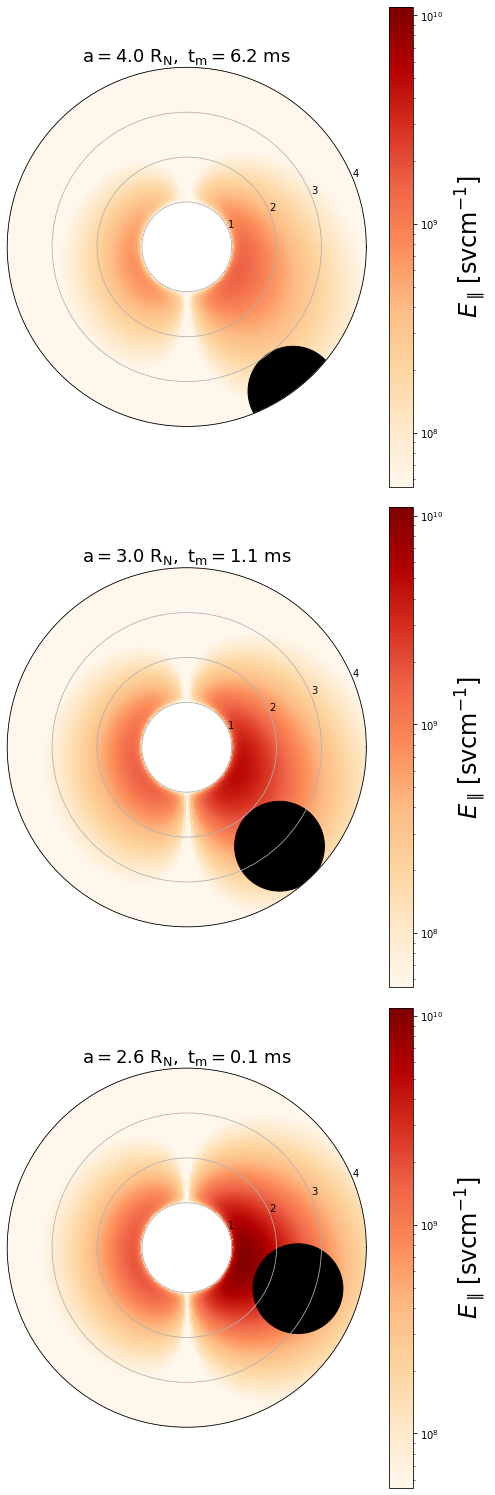

In [21]:
choice_panels = 1
# For the two dimensional case, we make either a gif of the motion, or a set of panels at 3 different separations
if choice_panels == 0:

    print('plot gif movie')

    a_arr = a_t(t_arr, a0)
    number_of_plots = 100

    a_arr2 = np.linspace(a0, a_min, number_of_plots)
    t_arr2 = []

    x_size = 7


    # plt.colorbar(im)
    print('Begin making images: ')
    for num, a in enumerate(a_arr2):
        if (num % 10) == 0:
             print('Num: ', num, '/', len(a_arr2))
        a_index = np.argmin(np.abs(a_arr - a))
        a_real = a_arr[a_index]
        t_real = t_arr[a_index]

        mapvals = np.zeros((len(r_arr), len(phi_arr)))
        t_arr2.append(t_merge(a, a_min))
        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, subplot_kw=dict(polar=True),
                           figsize=(x_size, x_size))
        ax.set_title(r'$\rm a = {}\ R_N,\ t_m = {}\ $ms'.format(np.round(a_arr2[num] / Constants.R_ns, 1),
                                                                 np.round((t_arr2[num] * 1000), 1)), fontsize=18)

        for i, r in enumerate(r_arr):
            for j, phi in enumerate(phi_arr):
#                 print(E_arr_full[i, 0, j, a_index])
                mapvals[j, i] = np.abs(E_arr_full[i, 0, j, a_index])

        r_mesh, phi_mesh = np.meshgrid(r_arr, phi_arr)

        im = ax.pcolormesh(phi_mesh, r_mesh, mapvals, cmap=plt.cm.OrRd,
                            norm=colors.LogNorm(vmin=np.amax(E_arr_full) / 200, vmax=np.amax(E_arr_full)))

        circle = plt.Circle(((a_real / Constants.R_ns) * np.cos(phi_m_t(beta_t(a_real), t_real, a_real)),
                             (a_real / Constants.R_ns) * np.sin(phi_m_t(beta_t(a_real), t_real, a_real))), 1,
                            transform=ax.transData._b, color='k')

        ax.add_patch(circle)
        cbar = plt.colorbar(im, ax=ax)  # ,label=r'$\frac{E}{E_s}$')#,fontsize='22')
        cbar.set_label(r'$E$', rotation=0, fontsize='24', labelpad=(10))
        # ax.scatter(0,4,color='c',linewidth=60)
        ax.set_rticks([1, 2, 3, 4])
        ax.set_thetagrids([])
        ax.grid(True)
        ax.set_rlim(0, 4)
#         ax.set_theta_offset(np.pi / 2)

        plt.savefig('/Users/alex/Documents/Work/NS_Merger/Gif_Plots/Gif_{}.png'.format(num),dpi=400)

        # plt.show()

        # thetas1 = np.arccos((r_arr**2 + (a_arr[a_index]/R_ns)**2 - 1.0)/(2*r_arr*(a_arr[a_index]/R_ns))) + magnetar_positions[a_index,1]

    #     #rs = (a_arr[a_index]/R_ns)*np.cos(thetas) + np.sqrt(((a_arr[a_index]/R_ns)**2) *(np.cos(theta**2)) +1 - (a_arr[a_index]/R_ns)**2)
    #     #rs = 1 + (a_arr[a_index]/R_ns)**2 - 2 * (a_arr[a_index]/R_ns) * np.cos(thetas)
    #     #print(rs)

    images = []
    for i, name in enumerate(np.arange(number_of_plots)):
        images.append(imageio.imread('Gif_Plots/Gif_{}.png'.format(i)))
    imageio.mimsave('Gif_Plots/Movie_test_newmask.gif', images, duration=0.1)
    print('Made Movie')

elif choice_panels == 1:

    a_arr = a_t(t_arr, a0)

    a_arr2 = [3.99e6, 3.02e6, 2.64e6]

    t_arr2 = []
    fig, ax = plt.subplots(nrows=len(a_arr2), ncols=1, sharex=True, sharey=True, subplot_kw=dict(polar=True),
                           figsize=(7, 21), squeeze=False)
    # plt.colorbar(im)
    print('Begin making images: ')
    for num, a in enumerate(a_arr2):
        ax = ax.flatten()
        print('Num: ', num + 1, '/', len(a_arr2))
        a_index = np.argmin(np.abs(a_arr - a))
        a_real = a_arr[a_index]
        t_real = t_arr[a_index]

        mapvals = np.zeros((len(r_arr),len(phi_arr)))
        t_arr2.append(t_merge(a, a_min))
        ax[num].set_title(r'$ \rm a = {}\ R_N,\ t_m = {}\ $ms'.format(np.round(a_arr2[num] / Constants.R_ns, 1),
                                                                      np.round((t_arr2[num] * 1000), 1)),fontsize=18)
        circle = plt.Circle(((a_real / Constants.R_ns)*np.cos(phi_m_t(beta_t(a_real), t_real, a_real)), (a_real / Constants.R_ns)*np.sin(phi_m_t(beta_t(a_real), t_real, a_real))), 1,transform=ax[num].transData._b, color='k')

        ax[num].add_patch(circle)

        # ax[num].tick_params(colors='blue')

        for i, r in enumerate(r_arr):
            for j, phi in enumerate(phi_arr):
                # theta_crit = np.arccos(np.sqrt(1 - (1 / (a_arr[a_index] / Constants.R_ns))))
                # # theta_crit = np.arctan(1/(a_arr[a_index]/R_ns))
                #
                # if ((theta <= theta_crit) or (theta > 2 * np.pi - theta_crit)):
                #     r2 = ((a_arr[a_index] / Constants.R_ns)) * np.cos(theta) + np.sqrt(
                #         ((a_arr[a_index] / Constants.R_ns) ** 2) * np.cos(theta) ** 2 + 1 - (a_arr[a_index] / Constants.R_ns) ** 2)
                #     r1 = ((a_arr[a_index] / Constants.R_ns)) * np.cos(theta) - np.sqrt(
                #         ((a_arr[a_index] / Constants.R_ns) ** 2) * np.cos(theta) ** 2 + 1 - (a_arr[a_index] / Constants.R_ns) ** 2)
                #     # print(r1,r2)
                #     if r > r1 and r < r2:
                #         mapvals[j, i] = 0
                #     else:
                mapvals[j, i] = np.abs(E_arr_full[i, 0, j, a_index])

            # else:
            #     mapvals[j, i] = np.abs(E_arr_full[0,i, 0, j, a_index])
            # print('Number', num, ' ', np.mean(mapvals))
        r_mesh, phi_mesh = np.meshgrid(r_arr, phi_arr)
        im = ax[num].pcolormesh(phi_mesh, r_mesh, mapvals, cmap=plt.cm.OrRd,
                                norm=colors.LogNorm(vmin=np.amax(E_arr_full) / 200, vmax=np.amax(E_arr_full)))
        
        ax[num].set_rticks([1, 2, 3, 4, 5, 6])
        ax[num].set_thetagrids([])
        ax[num].grid(True)
        ax[num].set_rlim(0, 4)

        cbar = plt.colorbar(im, ax=ax[num])  # ,label=r'$\frac{E}{E_s}$')#,fontsize='22')
        cbar.set_label(r'$E_{\parallel} \, [{\rm sv cm^{-1}}]$', rotation=90., fontsize='24', labelpad=(10))





        # theta_crit = np.arccos(np.sqrt(1 - (1 / (a_arr[a_index] / Constants.R_ns))))
        # # theta_crit = np.arctan(1/(a_arr[a_index]/R_ns))
        # # print(theta_crit)
        #
        # # print(a_arr[a_index]/R_ns)
        # thetas = np.linspace(-theta_crit, theta_crit, 10000)
        # rs = ((a_arr[a_index] / Constants.R_ns)) * np.cos(thetas) + np.sqrt(
        #     ((a_arr[a_index] / Constants.R_ns) ** 2) * np.cos(thetas) ** 2 + 1 - (a_arr[a_index] / Constants.R_ns) ** 2)
        # rs2 = ((a_arr[a_index] / Constants.R_ns)) * np.cos(thetas) - np.sqrt(
        #     ((a_arr[a_index] / Constants.R_ns) ** 2) * np.cos(thetas) ** 2 + 1 - (a_arr[a_index] / Constants.R_ns) ** 2)
        # # rs = a_arr[a_index]/R_ns + 1*np.cos(thetas)

        # rs = (a_arr[a_index]/R_ns)*np.cos(thetas) + np.sqrt(((a_arr[a_index]/R_ns)**2) *(np.cos(theta**2)) +1 - (a_arr[a_index]/R_ns)**2)
        # rs = 1 + (a_arr[a_index]/R_ns)**2 - 2 * (a_arr[a_index]/R_ns) * np.cos(thetas)
        # print(rs)
        # ax[num].plot(thetas, rs, color='k', linewidth=2)
        # ax[num].plot(thetas, rs2, color='k', linewidth=2)

        # plt.plot(r,2*a_arr2[num]*np.cos(theta))

    plt.tight_layout()
    # plt.colorbar(im)
    # plt.grid(True)
    # ax.grid(True)
    # plt.colorbar(im)

    # plt.label
    # plt.show()

    # ax = fig.add_subplot(111, projection='polar')
    # plt.colorbar(im)
    # ax.grid(True)
    plt.savefig('Panels_test_OrRd_2.png' ,dpi=500)

#
